In [4]:
import pandas as pd
import geopandas as gpd
from shapely import Point
import numpy as np

## Read raw data from SFTMA
https://data.sfgov.org/Transportation/Map-of-Transit-Only-Lanes/6zeq-tp86

In [5]:
sfmta_lanes = pd.read_csv('SFMTA Transit Only Lanes.csv')
print(sfmta_lanes.columns)

Index(['objectid', 'ID', 'ST_NAME', 'SPAN_OPS', 'HRS_BEGIN', 'HRS_END',
       'REDLANE', 'TAXI', 'HOURS', 'STATUS', 'DAYTYPE_WD', 'DAYTYPE_WE',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE',
       'FROM_ST', 'TO_ST', 'CORRIDOR', 'DIRECTION', 'LAYOUT', 'DAY_TYPE',
       'IMPLEMENT', 'MUNI_ROUTE', 'BUSORTRAIN', 'MTAB_DATE', 'MTAB_MOTION',
       'shape', 'data_as_of', 'data_loaded_at', 'analysis_neighborhood',
       'supervisor_district'],
      dtype='object')


In [6]:
sfmta_lanes['shape'][0]
import geopandas as gpd
from shapely.wkt import loads

def wkt_to_geometry(df, wkt_column_name):
    # Parse WKT representations and create geometry objects
    geometries = df[wkt_column_name].apply(loads)
    
    # Create a GeoDataFrame with the geometry column
    gdf = gpd.GeoDataFrame(df, geometry=geometries)
    
    return gdf

# Example usage:
# Assuming df is your DataFrame and 'geometry_wkt' is the column containing WKT representations
gdf = wkt_to_geometry(sfmta_lanes, 'shape')
gdf.head()

,objectid,ID,ST_NAME,SPAN_OPS,HRS_BEGIN,HRS_END,REDLANE,TAXI,HOURS,STATUS,...,MUNI_ROUTE,BUSORTRAIN,MTAB_DATE,MTAB_MOTION,shape,data_as_of,data_loaded_at,analysis_neighborhood,supervisor_district,geometry
0,961,NaN,TETL,NaN,NaN,NaN,NaN,NaN,NaN,Future TETL corridor,...,NaN,NaN,NaN,NaN,"LINESTRING (-122.447314725 37.782396637, -122....",03/25/2021 11:48:51 AM,01/18/2024 03:36:28 PM,"Golden Gate Park, Haight Ashbury, Lone Mountai...","1, 2, 5","LINESTRING (-122.44731 37.78240, -122.44762 37..."
1,1289,NaN,TETL,NaN,NaN,NaN,NaN,NaN,NaN,Implemented TETL Corridor,...,NaN,NaN,NaN,NaN,"LINESTRING (-122.493365 37.779824, -122.492245...",03/25/2021 01:24:27 PM,01/18/2024 03:36:28 PM,Outer Richmond,1,"LINESTRING (-122.49336 37.77982, -122.49225 37..."
2,735,NaN,TETL,NaN,NaN,NaN,NaN,NaN,NaN,Future TETL corridor,...,NaN,NaN,NaN,NaN,"LINESTRING (-122.45919198 37.785686686, -122.4...",03/25/2021 11:48:51 AM,01/18/2024 03:36:28 PM,"Chinatown, Financial District/South Beach, Inn...","1, 2, 3","LINESTRING (-122.45919 37.78569, -122.44680 37..."
3,977,NaN,TETL,NaN,NaN,NaN,NaN,NaN,NaN,Future TETL corridor,...,NaN,NaN,NaN,NaN,"LINESTRING (-122.474612 37.806274, -122.472652...",03/25/2021 11:48:51 AM,01/18/2024 03:36:28 PM,"Marina, Presidio","2, 3","LINESTRING (-122.47461 37.80627, -122.47265 37..."
4,650,NaN,Van Ness Ave,24 Hours,0.0,2400.0,Non-red,no,24 hours everyday,Future TETL corridor,...,NaN,NaN,NaN,16-032,"LINESTRING (-122.424728542 37.802269613, -122....",03/25/2021 11:48:51 AM,01/18/2024 03:36:28 PM,"Marina, Russian Hill","2, 3","LINESTRING (-122.42473 37.80227, -122.42521 37..."


<AxesSubplot:>

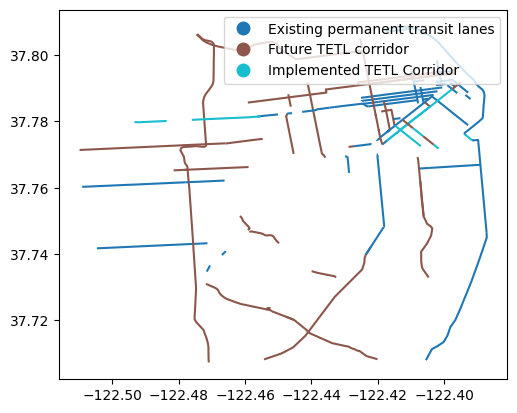

In [7]:
gdf.plot(gdf['STATUS'], legend=True)

## Remove planning for future bus lanes with no planned start date

Index(['objectid', 'ST_NAME', 'HOURS', 'HRS_BEGIN', 'HRS_END', 'STATUS',
       'REDLANE', 'TAXI', 'FROM_ST', 'TO_ST', 'CORRIDOR', 'IMPLEMENT',
       'geometry', 'BUSORTRAIN'],
      dtype='object')


<AxesSubplot:>

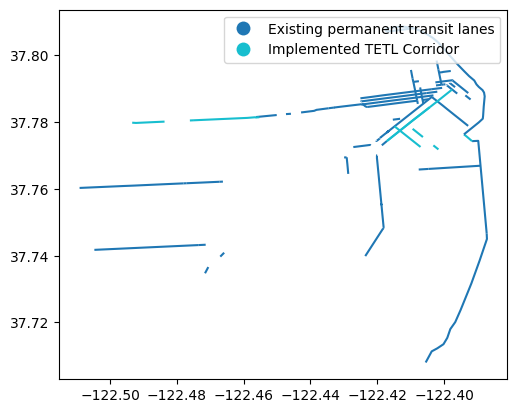

In [8]:
# Assuming df is your DataFrame

# Filter out rows where STATUS is 'Future TETL corridor'
gdf = gdf[gdf['STATUS'] != 'Future TETL corridor']
gdf_filtered = gdf[['objectid','ST_NAME','HOURS', 'HRS_BEGIN','HRS_END','STATUS','REDLANE','TAXI','FROM_ST','TO_ST','CORRIDOR','IMPLEMENT','geometry','BUSORTRAIN']].copy()

# Show filtered DataFrame
print(gdf_filtered.columns)
gdf_filtered.plot(gdf_filtered['STATUS'],legend=True)

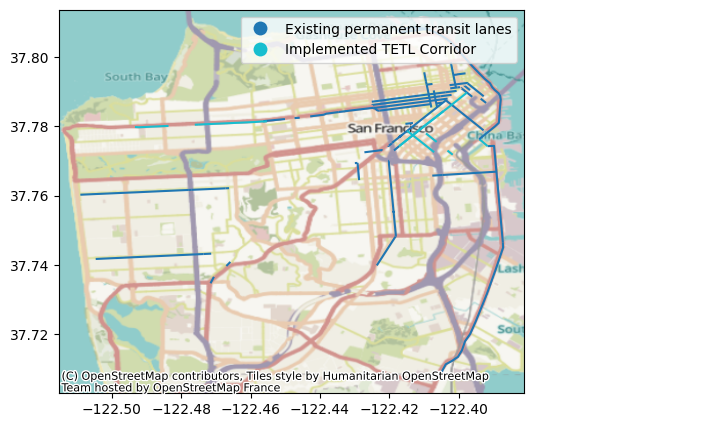

,objectid,ST_NAME,HOURS,HRS_BEGIN,HRS_END,STATUS,REDLANE,TAXI,FROM_ST,TO_ST,CORRIDOR,IMPLEMENT,geometry,BUSORTRAIN
1,1289,TETL,NaN,NaN,NaN,Implemented TETL Corridor,NaN,NaN,NaN,NaN,TETL,NaN,"LINESTRING (-122.49336 37.77982, -122.49225 37...",NaN
5,1293,NaN,NaN,NaN,NaN,Existing permanent transit lanes,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.40909 37.80811, -122.40731 37...",NaN
6,641,Jefferson Street,24 hours everyday,0.0,2400.0,Existing permanent transit lanes,Non-red,no,Powell,Taylor,NaN,1996-12-31T16:00:00.000000000-08:00,"LINESTRING (-122.41252 37.80863, -122.41580 37...",Train
8,712,16th St,24 hours everyday,0.0,2400.0,Existing permanent transit lanes,Non-red,taxi allowed,Vermont,Potrero,NaN,2017-01-31T16:00:00.000000000-08:00,"LINESTRING (-122.40463 37.76598, -122.40757 37...",NaN
9,1296,NaN,NaN,NaN,NaN,Existing permanent transit lanes,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.39160 37.77430, -122.38975 37...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,682,Geary Street,24 hours everyday,0.0,2400.0,Existing permanent transit lanes,Non-red,taxi allowed,Powell St,Market St,NaN,1979-12-31T16:00:00.000000000-08:00,"LINESTRING (-122.40317 37.78801, -122.40545 37...",NaN
113,648,Judah Ave,24 hours everyday,0.0,2400.0,Existing permanent transit lanes,red lane,no,9th Ave,10th Ave,NaN,NaN,"LINESTRING (-122.46620 37.76218, -122.46725 37...",NaN
114,733,TETL,NaN,NaN,NaN,Implemented TETL Corridor,NaN,NaN,NaN,NaN,TETL,NaN,"LINESTRING (-122.47514 37.78053, -122.47233 37...",NaN
115,706,Bush St,3PM-8PM M-F,1500.0,2000.0,Existing permanent transit lanes,Non-red,taxi allowed,Montgomery,Sansome,NaN,2014-12-31T16:00:00.000000000-08:00,"LINESTRING (-122.40239 37.79098, -122.40074 37...",NaN


In [9]:
import contextily as ctx
from matplotlib import pyplot as plt

gdf_filtered.set_crs(epsg=4326)

ax = gdf_filtered.plot(column='STATUS', legend=True, figsize=(6, 8))

# Add basemap
ctx.add_basemap(ax, zoom=12, crs='EPSG:4326')


# Show plot
plt.show()
%matplotlib inline
gdf_filtered.head(12)
gdf_filtered

In [11]:
gdf_filtered.to_file("SFTMA_lanes.json", driver="GeoJSON")